In [19]:
%matplotlib inline
#  work flow
import pandas as pd
import numpy as np
from sklearn.cross_validation import train_test_split
from sklearn import preprocessing
import scipy.stats as stats
# Visualization
from matplotlib import pyplot as plt
from pandas.tools.plotting import scatter_matrix
# Modeling
from sklearn.neighbors import KNeighborsClassifier

In [3]:
original_data = pd.read_csv("train.csv")


# Data fields - Info pulled from Kaggle

- id - id of the creature
- bone_length - average length of bone in the creature, normalized between 0 and 1
- rotting_flesh - percentage of rotting flesh in the creature
- hair_length - average hair length, normalized between 0 and 1
- has_soul - percentage of soul in the creature
- color - dominant color of the creature: 'white','black','clear','blue','green','blood'
- type - target variable: 'Ghost', 'Goblin', and 'Ghoul'

Quick overview

In [4]:
original_data.head(), original_data.shape

(   id  bone_length  rotting_flesh  hair_length  has_soul  color    type
 0   0     0.354512       0.350839     0.465761  0.781142  clear   Ghoul
 1   1     0.575560       0.425868     0.531401  0.439899  green  Goblin
 2   2     0.467875       0.354330     0.811616  0.791225  black   Ghoul
 3   4     0.776652       0.508723     0.636766  0.884464  black   Ghoul
 4   5     0.566117       0.875862     0.418594  0.636438  green   Ghost,
 (371, 7))

## Type of Variable
    Predictor Variable (features)
       - bone_length
       - rotting_flesh
       - hair_length
       - has_soul
       - color
    Target Variable (target)
       - type

## Data Type
    Numeric
    - bone_length
    - rotting_flesh
    - hair_length
    - has_soul
    
    Character
    - color
    - type
    
## Variable Category
    Continuous
    - bone_length
    - rotting_flesh
    - hair_length
    - has_soul
    Categorical
    - color
    - type

Univariate Analysis

In [5]:
original_data.describe()

,id,bone_length,rotting_flesh,hair_length,has_soul
count,371.000000,371.000000,371.000000,371.000000,371.000000
mean,443.676550,0.434160,0.506848,0.529114,0.471392
std,263.222489,0.132833,0.146358,0.169902,0.176129
min,0.000000,0.061032,0.095687,0.134600,0.009402
25%,205.500000,0.340006,0.414812,0.407428,0.348002
50%,458.000000,0.434891,0.501552,0.538642,0.466372
75%,678.500000,0.517223,0.603977,0.647244,0.600610
max,897.000000,0.817001,0.932466,1.000000,0.935721


/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  if __name__ == '__main__':


{'boxes': [<matplotlib.lines.Line2D at 0x116e1dc50>,
 'caps': [<matplotlib.lines.Line2D at 0x116e2cb90>,
 'fliers': [<matplotlib.lines.Line2D at 0x116e39e90>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x116e39850>,
 'whiskers': [<matplotlib.lines.Line2D at 0x116e1de50>,
  <matplotlib.lines.Line2D at 0x116e8c9d0>]}

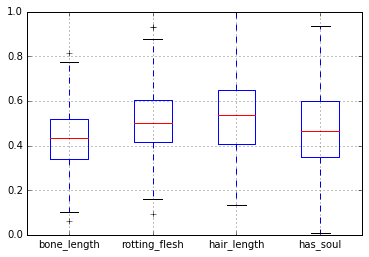

In [7]:
original_data[['bone_length','rotting_flesh','hair_length','has_soul']].boxplot()

### There is some indication that there may be outliers within bone_length and rotting_flesh

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x116edaf50>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1170df910>]], dtype=object)

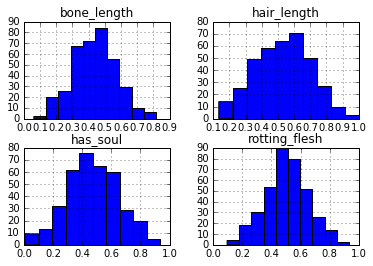

In [8]:
original_data[['bone_length','rotting_flesh','hair_length','has_soul']].hist()

### The continuous variable seem to be normally distributed.

### Frequency Data 

In [13]:
print original_data['type'].value_counts(),'\n' ,original_data['color'].value_counts()

Ghoul     129
Goblin    125
Ghost     117
Name: type, dtype: int64 
white    137
clear    120
green     42
black     41
blue      19
blood     12
Name: color, dtype: int64


In [15]:
print original_data['type'].value_counts() / len(original_data['type']),'\n' ,
original_data['color'].value_counts() / len(original_data['color'])

Ghoul     0.347709
Goblin    0.336927
Ghost     0.315364
Name: type, dtype: float64 


white    0.369272
clear    0.323450
green    0.113208
black    0.110512
blue     0.051213
blood    0.032345
Name: color, dtype: float64

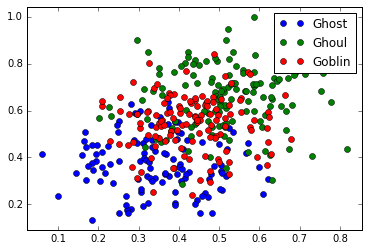

In [33]:
type_group = original_data[['bone_length','rotting_flesh','hair_length','has_soul','color','type']].groupby('type')
fig, ax = plt.subplots()
ax.margins(0.05)
for name, group in type_group:
    ax.plot(group.bone_length, group.hair_length, marker = 'o', linestyle='', ms=6, label = name)
ax.legend()

In [24]:
help(scatter_matrix)

Help on function scatter_matrix in module pandas.tools.plotting:

scatter_matrix(frame, alpha=0.5, figsize=None, ax=None, grid=False, diagonal='hist', marker='.', density_kwds=None, hist_kwds=None, range_padding=0.05, **kwds)
    Draw a matrix of scatter plots.
    
    Parameters
    ----------
    frame : DataFrame
    alpha : float, optional
        amount of transparency applied
    figsize : (float,float), optional
        a tuple (width, height) in inches
    ax : Matplotlib axis object, optional
    grid : bool, optional
        setting this to True will show the grid
    diagonal : {'hist', 'kde'}
        pick between 'kde' and 'hist' for
        either Kernel Density Estimation or Histogram
        plot in the diagonal
    marker : str, optional
        Matplotlib marker type, default '.'
    hist_kwds : other plotting keyword arguments
        To be passed to hist function
    density_kwds : other plotting keyword arguments
        To be passed to kernel density estimate plot

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11907ff10>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11b7d7d90>]], dtype=object)

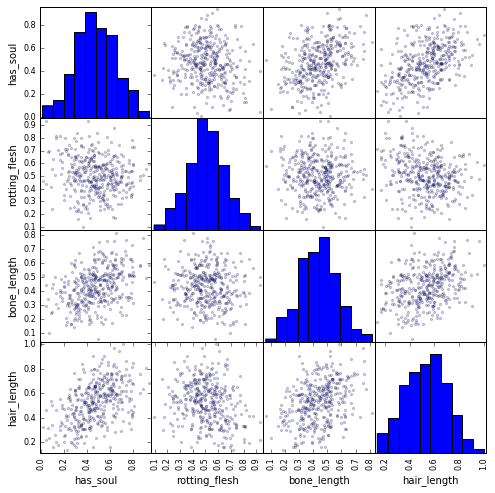

In [25]:
scatter_matrix(original_data[['has_soul','rotting_flesh','bone_length', 'hair_length']], alpha=0.2, figsize=(8,8), diagonal='hist')

In [27]:
original_data[['has_soul','rotting_flesh','bone_length', 'hair_length']].corr()

,has_soul,rotting_flesh,bone_length,hair_length
has_soul,1.000000,-0.132051,0.381675,0.474835
rotting_flesh,-0.132051,1.000000,-0.041716,-0.220353
bone_length,0.381675,-0.041716,1.000000,0.353881
hair_length,0.474835,-0.220353,0.353881,1.000000


#### Correlations to take note of:
- has_soul | bone_length
- has_soul | hair_length
- rotting_flesh | hair_length
- hair_length | bone_length

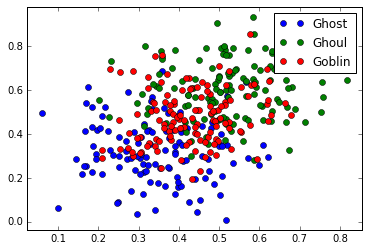

In [28]:
fig, ax2 = plt.subplots()
ax2.margins(0.05)
for name, group in type_group:
    ax2.plot(group.bone_length, group.has_soul, marker = 'o', linestyle='', ms=6, label = name)
ax2.legend()

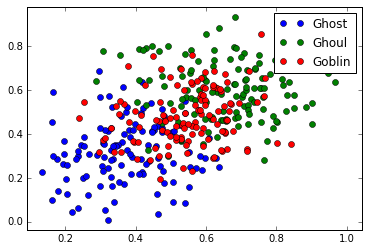

In [29]:
fig, ax3 = plt.subplots()
ax3.margins(0.05)
for name, group in type_group:
    ax3.plot(group.hair_length, group.has_soul, marker = 'o', linestyle='', ms=6, label = name)
ax3.legend()

In [39]:
data = original_data.copy()

In [40]:
rotting_flesh_max = data['rotting_flesh'].max()
rotting_flesh_min = data['rotting_flesh'].min()
rotting_flesh_difference = rotting_flesh_max - rotting_flesh_min
data['rotting_flesh_norm'] = data['rotting_flesh'].apply(lambda x: (x - rotting_flesh_min)/(rotting_flesh_difference))

In [ ]:
data_group = data.groupby('type')

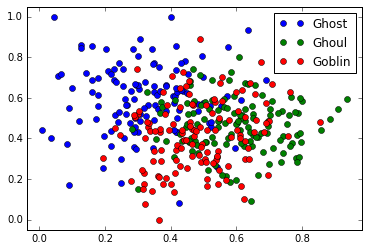

In [45]:
fig, ax3 = plt.subplots()
ax3.margins(0.05)
for name, group in data_group:
    ax3.plot(group.has_soul, group.rotting_flesh_norm, marker = 'o', linestyle='', ms=6, label = name)
ax3.legend()

OrderedDict([(('Ghost', 'black'),
              {'boxes': [<matplotlib.lines.Line2D at 0x12ce65fd0>,
               'caps': [<matplotlib.lines.Line2D at 0x12cbfc850>,
               'fliers': [<matplotlib.lines.Line2D at 0x12ce7c650>,
               'means': [],
               'medians': [<matplotlib.lines.Line2D at 0x12ce71fd0>,
               'whiskers': [<matplotlib.lines.Line2D at 0x12ce71150>,
                <matplotlib.lines.Line2D at 0x12cecf190>]}),
             (('Ghost', 'blood'),
              {'boxes': [<matplotlib.lines.Line2D at 0x12cef1590>,
               'caps': [<matplotlib.lines.Line2D at 0x12cee5d10>,
               'fliers': [<matplotlib.lines.Line2D at 0x12ce39190>,
               'means': [],
               'medians': [<matplotlib.lines.Line2D at 0x12ce4cd50>,
               'whiskers': [<matplotlib.lines.Line2D at 0x12cef1690>,
                <matplotlib.lines.Line2D at 0x12cf2e2d0>]}),
             (('Ghost', 'blue'),
              {'boxes': [<matplotlib.line

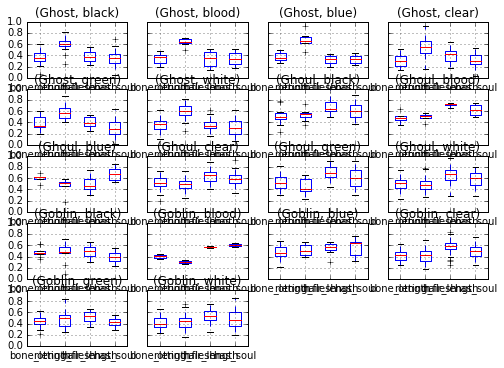

In [42]:
color_group = original_data[['bone_length','rotting_flesh','hair_length','has_soul','color','type']].groupby(['type','color'])
color_group.boxplot(figsize=(8,6))